In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt


In [2]:
plt.close()

N=40
M=40
e=20 #empty percent
n_race=3 #number of races
empties=[]

agents=np.random.random((N,M))


In [3]:
def race_up(n,agents):
    
    for i in range(N):
        for j in range(M):
            agents[i,j]=math.floor(n*agents[i,j])+1      
    return agents

def empty_up(e,agents):
    
    for i in range(int(round(e*N*M/100.0))):
        a,b=random.choice(range(N)),random.choice(range(M))
        empties.append([a,b])
        agents[a,b]=0
        
    return agents,empties

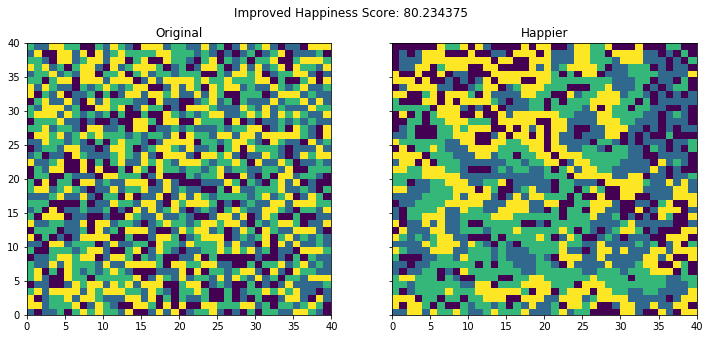

In [4]:

#___________________________________________
neixy=np.array([[-1,1],[0,1],[1,1],[-1,0],[1,0],[-1,-1],[0,-1],[1,-1]])

def neibs(i,j):
    neibs=[]
    neib=neixy+np.array([i,j])
    for i in neib :
        if -1<i[0]<N and -1<i[1]<M : neibs.append(list(i))
    return list(neibs)
    
def is_happy(i,j):
    neighbours=[int(agents[i,j])]
    for k in neibs(i,j):
        neighbours.append(int(agents[k[0],k[1]]))
    #print(neighbours)
    race_slice=(neighbours.count(int(agents[i,j])))/float(len(neighbours)-neighbours.count(0))
    
    if neighbours.count(0)>0:
        dominancy=1.0/(len(set(neighbours))-1)#+1-neighbours.count(0)) # 1 over number of unique races in the neibourhood minus the empty houses
    else: 
        dominancy=1.0/(len(set(neighbours)))
    if race_slice>dominancy : return True
    else: return False



race_up(n_race,agents)
empty_up(e,agents)

fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
axs[0].pcolor(agents)
axs[0].set_title('Original')


def happiness_score():
    trues=0
    for i in range(N):
        for j in range(M):
            #print (i,j,agents[i,j], is_happy(i,j))
            
            if int(agents[i,j])!=0 and is_happy(i,j) : trues+=1#;print(trues)
    return 100*float(trues)/(M*N-round(e*N*M/100.0))
        
        
def move(i,j):
    new_address=random.choice(empties)
    agents[new_address[0],new_address[1]]=agents[i,j]
    agents[i,j]=0
    empties.append([i,j])
    empties.remove(new_address)
    


while happiness_score() <80.0:
    #print agents, '  |happiness score',
    #print(happiness_score())
    for i in range(N):
        for j in range(M):
            if agents[i,j]!=0:
                if is_happy(i,j): pass
                else : move(i,j)

axs[1].pcolor(agents)
axs[1].set_title('Happier')
fig.suptitle('Improved Happiness Score: '+str(happiness_score()))

plt.show()